In [201]:
import os, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [202]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Fri, 08 May 2020 15:07


In [203]:
base_path = os.getcwd().split('\\scripts')[0]
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Work From Home

In [204]:
df = pd.read_csv(os.path.join(relative_path,'agg','work_home_location.csv'))
parcel_geog = pd.read_sql_table('parcel_2018_geography', 'sqlite:///'+os.path.join(base_path,r'inputs\db\soundcast_inputs.db')) 
df = df.merge(parcel_geog, left_on='pwpcl',right_on='ParcelID')
df = df.merge(parcel_geog, left_on='hhparcel',right_on='ParcelID', suffixes=['_work','_home'])
# Get work-from-home people
df_wfh = df[df['hhparcel'] == df['pwpcl']]

_df = df_wfh.groupby('CountyName_work').sum()[['psexpfac']]
_df.loc['Total',:] = _df.sum(axis=0)
_df = _df.reset_index()

# Survey
df_survey = pd.read_csv(os.path.join(relative_path,'agg\survey','work_home_location.csv'))
# df_survey
df_survey = df_survey.merge(parcel_geog, left_on='pwpcl',right_on='ParcelID')
df_survey = df_survey.merge(parcel_geog, left_on='hhparcel',right_on='ParcelID', suffixes=['_work','_home'])
df_survey_wfh = df_survey[df_survey['hhparcel'] == df_survey['pwpcl']]

_df_survey = df_survey_wfh.groupby('CountyName_work').sum()[['psexpfac']]
_df_survey.loc['Total',:] = _df_survey.sum(axis=0)
_df_survey = _df_survey.reset_index()

dfmerge = _df.merge(_df_survey, on='CountyName_work', suffixes=['_model','_survey'])
dfmerge.rename(columns={'CountyName_work': 'County', 'psexpfac_model': 'model', 'psexpfac_survey': 'survey'},
              inplace=True)
dfmerge['diff'] = dfmerge['survey']-dfmerge['model']
dfmerge['% diff'] = dfmerge['diff']/dfmerge['survey']
dfmerge

,County,model,survey,diff,% diff
0,King,"51,307","82,750","31,443",0
1,Kitsap,"8,261","9,447","1,186",0
2,Pierce,"20,999","22,401","1,402",0
3,Snohomish,"21,915","25,771","3,856",0
4,Total,"102,482","140,369","37,887",0


# Commute Distance

In [205]:
df = pd.read_csv(os.path.join(relative_path,'agg','tour_distance.csv'))
df = df[df['dpurp'] == 'Work']

pd.options.display.float_format = '{:0,.4f}'.format
_df = df.groupby('travdist_bin').sum()[['trexpfac']].reset_index()

_df['percent'] = _df['trexpfac']/_df['trexpfac'].sum()
_df['cumulative_percent'] = _df['percent'].cumsum()

# remove records that are outside 99% of records
_df = _df[_df['cumulative_percent'] <= 0.99]

In [206]:
df_survey = pd.read_csv(os.path.join(relative_path,'agg/survey','tour_distance.csv'))
## FIX ME! UPDATE THE SURVEY WITH SKIM VALUES!!

df_survey = df_survey[df_survey['dpurp'] == 'Work']

df_survey

_df_survey = df_survey.groupby('travdist_bin').sum()[['trexpfac']].reset_index()

_df_survey['percent'] = _df_survey['trexpfac']/_df_survey['trexpfac'].sum()
_df_survey['cumulative_percent'] = _df_survey['percent'].cumsum()

# remove records that are outside 99% of records
_df_survey = _df_survey[_df_survey['cumulative_percent'] <= 0.99]

In [207]:
_df_merged = _df.merge(_df_survey, on='travdist_bin', suffixes=['_model','_survey'])
# _df_merged

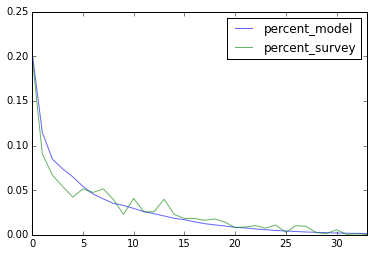

In [208]:
_df_merged[['percent_model','percent_survey']].plot(alpha=0.6)

# _df[['trexpfac']].plot(kind='bar')

# Distance by Mode

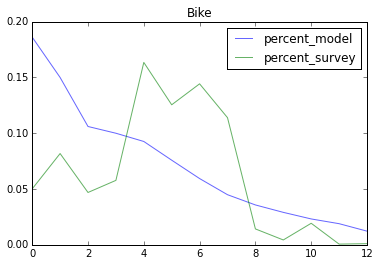

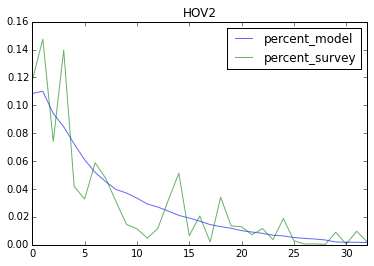

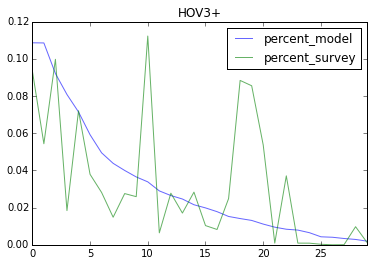

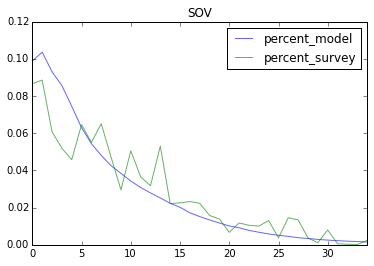

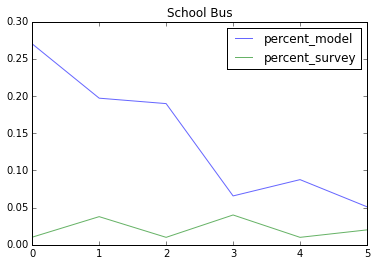

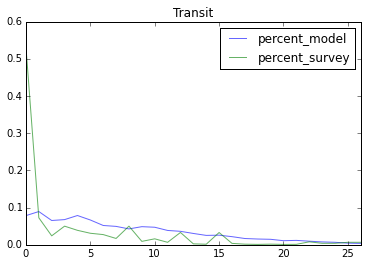

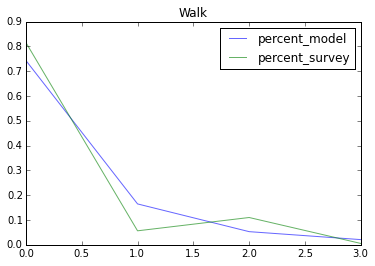

In [209]:
df = pd.read_csv(os.path.join(relative_path,'agg','tour_distance.csv'))
df = df[df['dpurp'] == 'Work']

for mode in df['mode'].unique():
#     print(mode)
    _df = df[df['mode'] == mode]
    
    _df = _df.groupby('travdist_bin').sum()[['trexpfac']].reset_index()

    _df['percent'] = _df['trexpfac']/_df['trexpfac'].sum()
    _df['cumulative_percent'] = _df['percent'].cumsum()

    # remove records that are outside 99% of records
    _df = _df[_df['cumulative_percent'] <= 0.99]
    
    _df_survey = df_survey[df_survey['mode'] == mode]
    _df_survey = _df_survey.groupby('travdist_bin').sum()[['trexpfac']].reset_index()

    _df_survey['percent'] = _df_survey['trexpfac']/_df_survey['trexpfac'].sum()
    _df_survey['cumulative_percent'] = _df_survey['percent'].cumsum()

    # remove records that are outside 99% of records
    _df_survey = _df_survey[_df_survey['cumulative_percent'] <= 0.99]
    
    _df_merged = _df.merge(_df_survey, on='travdist_bin', suffixes=['_model','_survey'])
    _df_merged[['percent_model','percent_survey']].plot(alpha=0.6, title=mode)
    
    
# pd.options.display.float_format = '{:0,.4f}'.format
# _df = df.groupby('travdist_bin').sum()[['trexpfac']].reset_index()

# _df['percent'] = _df['trexpfac']/_df['trexpfac'].sum()
# _df['cumulative_percent'] = _df['percent'].cumsum()

# # remove records that are outside 99% of records
# _df = _df[_df['cumulative_percent'] <= 0.99]